# Word Vectorization


Which steps lead to numeric representation of words?

1. Word Vectorization Pipeline Example
2. Word Vectors for Browser History

## Illustrative Example

![pipe](img/draw.png)

Generally String Preprocessing is automated in libraries for Language Models, but you can configure them individually if you want.

Lets have a look at these steps with an example string.

In [19]:
example_string = "I love the cities of europe."

### Normalization

Only Lowercase Strings.

In [20]:
example_string = example_string.lower()
example_string

'i love the cities of europe.'

### Tokenization

A sentence or block of text that is stored in a single string is cut into a list of strings.

In [21]:
from gensim.utils import tokenize

preprocessed_string = list(tokenize(example_string))
preprocessed_string

['i', 'love', 'the', 'cities', 'of', 'europe']

### Lemmatization/Stemming

* Lemmatizing: Words are reduced to their base form.
* Stemming: Wordparts are cut off where morphologies are possible

Stemming is very agressive and can distort results.



In [22]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from gensim.parsing.porter import PorterStemmer

lemmatizer = WordNetLemmatizer()
preprocessed_string_lem = [lemmatizer.lemmatize(word) for word in preprocessed_string]
stemmer = PorterStemmer()
preprocessed_string_stem = [stemmer.stem(word) for word in preprocessed_string]
print("Lemmatizing")
print(preprocessed_string_lem)
print("Stemming")
print(preprocessed_string_stem)

Lemmatizing
['i', 'love', 'the', 'city', 'of', 'europe']
Stemming
['i', 'love', 'the', 'citi', 'of', 'europ']
[nltk_data] Downloading package wordnet to /home/gebauer/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Stopword Removal

* Words that occure in every text distort word representations
* Stopwords are like background music in a bar
* No propper inference with to much noise

In [23]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

en_stopwords = stopwords.words('english')
preprocessed_string = [word for word in preprocessed_string_lem if word not in en_stopwords]
preprocessed_string

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gebauer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['love', 'city', 'europe']

### Forming a Dictionary

In [24]:
from gensim import corpora

dictionary = corpora.Dictionary([preprocessed_string])
print(dictionary.token2id)

{'city': 0, 'europe': 1, 'love': 2}


### Bag of Words Representation

A bag of words maps each word to a given id-value.
Based on this vectors can be build, which can be fed into models.

In [25]:
bow = dictionary.doc2bow(preprocessed_string)
bow

[(0, 1), (1, 1), (2, 1)]

A Bag of Words Representation can be used to train language models.
Language Models try to represent semantics, syntactics and much more of natural language.

Bag of Words can be used to just count frequencies (TF-IDF) or for more advanced neural network based language models.

### Simple Vector Space Model with TF-IDF

TF-IDF is one of the simplest methods to vectorize words.

It is based on word frequencies and gives information how important words are for a specific document.

In [26]:
import gensim.downloader as api
from gensim.models.tfidfmodel import TfidfModel

dataset = api.load("text8")
dct = corpora.Dictionary(dataset)  # fit dictionary
corpus = [dct.doc2bow(line) for line in dataset]  # convert corpus to BoW format

model = TfidfModel(corpus)# fit model
vector = model[corpus[0]]
vector[:10]

[(1, 0.006704047545684609),
 (2, 0.0030255603220721273),
 (3, 0.003156168449586299),
 (4, 0.0036673470201144674),
 (5, 0.004575122435127926),
 (6, 0.0028052608258295926),
 (7, 0.004064820137019515),
 (8, 0.00014963587508918375),
 (9, 0.0007492665180478759),
 (10, 0.004142807322609117)]

### Neural Language Models

Neural language models use neural networks do model word embeddings.
One of the first was word2vec (2013).
Word2Vec comes in two variations `skipgram` and `continous bag of words`.

In [27]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')
print("First 10 Dimensions")
wv[preprocessed_string[0]][:10]

First 10 Dimensions


array([ 0.10302734, -0.15234375,  0.02587891,  0.16503906, -0.16503906,
        0.06689453,  0.29296875, -0.26367188, -0.140625  ,  0.20117188],
      dtype=float32)

## Word Vectors on Browser History

In [28]:
import json
import pandas as pd
import os

json_path = os.path.join(os.path.dirname(os.path.realpath("__file__")), "anonymized_history.json")
with open(json_path, "r") as json_file:
    browser_history_dict = json.load(json_file)
history_df = pd.DataFrame(browser_history_dict)
history_df.head(5)

,title,url
0,verdienst influencer - Google Suche,https://www.google.com/search?q=verdienst+infl...
1,verdienst influencer - Google Suche,https://www.google.com/search?q=verdienst+infl...
2,aka.ms/myrecoverykey - Google Suche,https://www.google.com/search?q=aka.ms%2Fmyrec...
3,Klassischer Rotkohl ganz einfach - emmikochtei...,https://emmikochteinfach.de/klassischer-rotkoh...
4,rotkohl zubereiten - Google Suche,https://www.google.com/search?q=rotkohl+zubere...


### Data Preparation

* identify google search entries
* identify language of search queries

In [29]:

def chrome_search(title_entry):
    return "Google Suche" in title_entry

history_df["chrome_search"] = history_df["title"].apply(chrome_search)

from langdetect import detect

google_df = history_df[["title", "chrome_search"]]
google_df = google_df[google_df["chrome_search"] == True]
google_df["title"] = google_df["title"].apply(lambda x:x.replace(" - Google Suche", '').replace(" – Google Suche", '')).drop_duplicates()
google_df = google_df.dropna()

# language
google_df["language"] = google_df["title"].apply(detect)
google_df["language"].unique()

array(['de', 'sk', 'ro', 'en', 'cy', 'it', 'fr', 'pt', 'sv', 'hu', 'id',
       'nl', 'sq', 'da', 'fi', 'af', 'no', 'lt', 'ca', 'pl'], dtype=object)

Language Identification is flawed:
* too many languages --> most likely there are false positives

In [30]:
google_df[google_df["language"] == "it"].head(3)

,title,chrome_search,language
11,olli dittrich,True,it
14,corona virus varianten,True,it
19,mirco nontschew,True,it


Language Classification might fail in some cases.
Ways to improve:
* Automatic Typo Detection
* Switch of Libraries
* Separate Entities from rest of the text

For simplicity, `'de'` tagged queries are taken, without adjustments.

### Applying a Pipeline for Word Embeddings

* until 2013 a lot of frameworks and models for creating word embeddings came up
* pipeline does not have to be implemented on its own, but can be configured

Libraries for Language Models:

* [spacy](https://spacy.io/)
* [flair](https://github.com/flairNLP/flair)
* [pytorch_transformer](https://pytorch.org/hub/huggingface_pytorch-transformers/)
* [scikit-learn](https://scikit-learn.org/stable/)
* [gensim](https://radimrehurek.com/gensim/)

In [31]:
from flair.embeddings import WordEmbeddings, DocumentPoolEmbeddings
from flair.data import Sentence
import torch

de_search = google_df.loc[google_df["language"] == "de", "title"].values.tolist()
glove_embedding = WordEmbeddings('de')
document_embedding = DocumentPoolEmbeddings([glove_embedding])
de_sentences = []
for query in de_search:
    try:
        sentence = Sentence(query.lower())
        de_sentences.append(sentence)
    except TypeError:
        print(query)

sentence_embeddings = []
for sentence in de_sentences:
    document_embedding.embed(sentence)
    embedding = sentence.embedding
    sentence_embeddings.append(embedding)
sentence_embeddings = torch.stack(sentence_embeddings, dim=0)
sentence_embeddings.shape

torch.Size([59, 300])

* Glove is also an rather older algorithm to create word embeddings
* for one word a vector of size 300 is received
* More modern embeddings incorporate contextual information - depending on the context the meaning changes
* These language models have very complex neural network architectures (so called transformer)
* Examples: BERT, ELMO, AlBERT, GPT-2, a.o.

### Visual Representation of Word Embeddings

* due to dimension reduction high dimensional embeddings can be visualized

In [32]:
from sklearn.manifold import TSNE

sentence_embeddings = sentence_embeddings.numpy()
red_embed = TSNE(n_components=2).fit_transform(sentence_embeddings)
red_embed = pd.DataFrame(red_embed, columns=["dim1", "dim2"])
red_embed["query"] = de_search

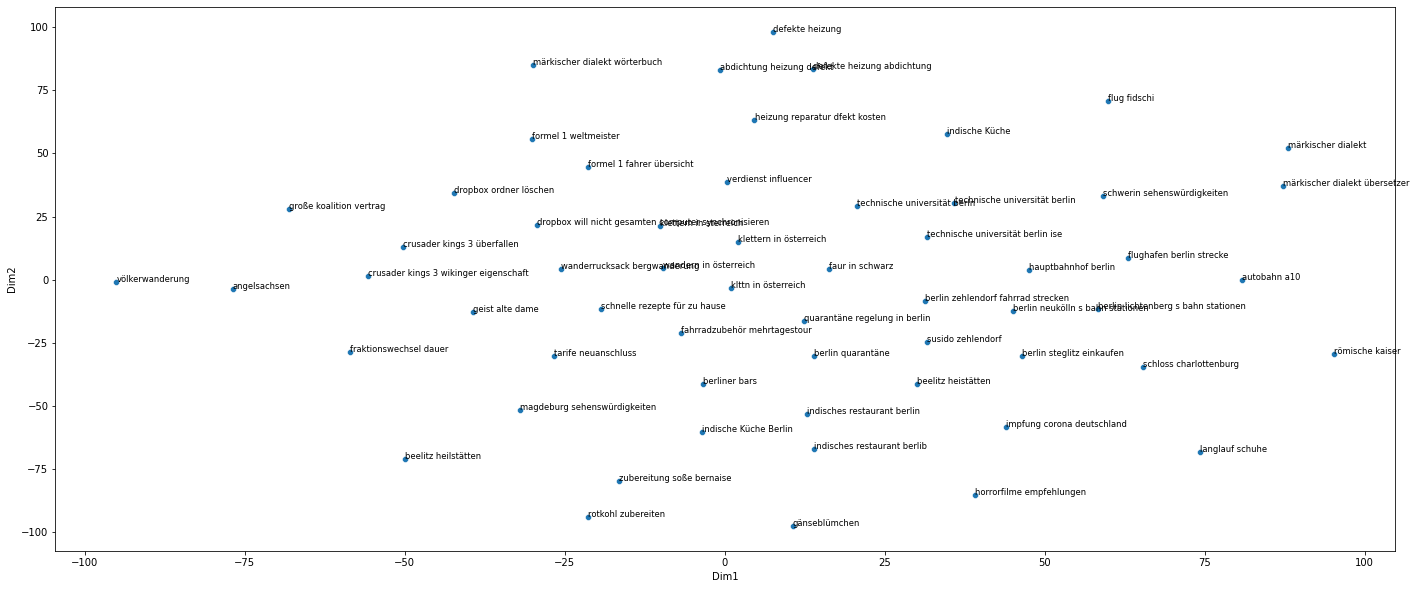

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, ax = plt.subplots(figsize=(24, 10))
p = sns.scatterplot(data=red_embed, x="dim1", y="dim2")
for line in red_embed.index:
         p.text(red_embed["dim1"][line]+0.01, red_embed["dim2"][line], 
                 red_embed["query"][line], horizontalalignment='left', 
                 size='small', color='black', weight='normal')
ind = np.arange(24)
ax.set_ylabel("Dim2")
ax.set_xlabel("Dim1")
plt.show()

Patterns:
* Berlin topics are in the same area
* search entries with typos or repeated similar equeries are close to each other
* close entries sometimes dont have a semantic connection

Things to optimize:

* Playing around with Word Embeddings - contextual WorEmbeddings, Transformer Models
* enrich with information - crawl google search results with respective words
* try topic recognition over enriched data
* preprocessing options: stopwords, different stemming/lemmatizing

# THANK YOU! :)

## Useful Links

Topic Recognition with Gensim: https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html

Document Embeddings with Flair: https://github.com/flairNLP/flair/blob/master/resources/docs/TUTORIAL_5_DOCUMENT_EMBEDDINGS.md

Bert as a Service: https://github.com/hanxiao/bert-as-service

Kaggle-Datasets: https://www.kaggle.com/datasets
